#### Build a recommender system by using cosine simillarties score.

## Recommendation System

A recommender system refers to a system that is capable of predicting the future preference of a set of items for a user, and recommend the top items. One key reason why we need a recommender system in modern society is that people have too much options to use from due to the prevalence of Internet. In the past, people used to shop in a physical store, in which the items available are limited. For instance, the number of movies that can be placed in a Blockbuster store depends on the size of that store. By contrast, nowadays, the Internet allows people to access abundant resources online. Netflix, for example, has an enormous collection of movies. Although the amount of available information increased, a new problem arose as people had a hard time selecting the items they actually want to see. This is where the recommender system comes in.There are two methods to construct a recommender system :
+ Content-based recommendation
+ Collaborative Filtering 

#### Collaborative Filtering
Collaborative Filtering (CF) is a mean of recommendation based on users’ past behavior. There are two categories of CF:
+ User-based: measure the similarity between target users and other users
+ Item-based: measure the similarity between the items that target users rates/ interacts with and other items

The key idea behind CF is that similar users share the same interest and that similar items are liked by a user.

Assume there are m users and n items, we use a matrix with size m*n to denote the past behavior of users. Each cell in the matrix represents the associated opinion that a user holds. For instance, M_{i, j} denotes how user i likes item j. Such matrix is called utility matrix. CF is like filling the blank (cell) in the utility matrix that a user has not seen/rated before based on the similarity between users or items. There are two types of opinions, explicit opinion and implicit opinion. The former one directly shows how a user rates that item (think of it as rating an app or a movie), while the latter one only serves as a proxy which provides us heuristics about how an user likes an item (e.g. number of likes, clicks, visits). Explicit opinion is more straight-forward than the implicit one as we do not need to guess what does that number implies. For instance, there can be a song that user likes very much, but he listens to it only once because he was busy while he was listening to it. Without explicit opinion, we cannot be sure whether the user dislikes that item or not. However, most of the feedback that we collect from users are implicit. 
##### User-based Collaborative Filtering
We know that we need to compute the similarity between users in user-based CF. But how do we measure the similarity? There are two options, Pearson Correlation or cosine similarity. Let u_{i, k} denotes the similarity between user i and user k and v_{i, j} denotes the rating that user i gives to item j with v_{i, j} = ? if the user has not rated that item. These two methods can be expressed as the followings:
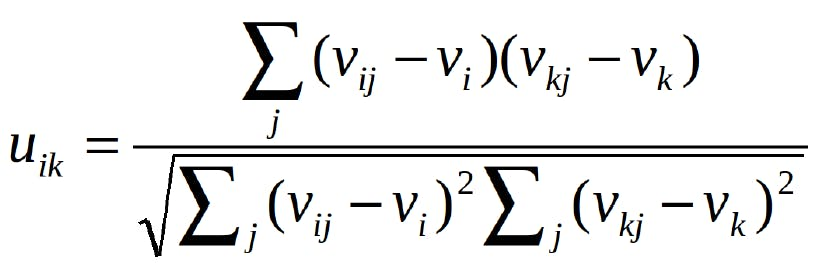





Pearson Correlation 
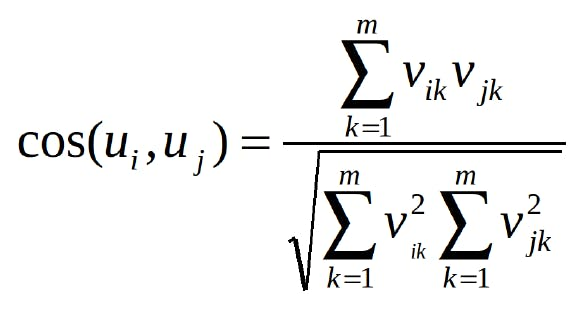




Cosine Similarity 

Both measures are commonly used.The difference is that Pearson Correlation is invariant to adding a constant to all elements.

Now, we can predict the users’ opinion on the unrated items with the below equation:
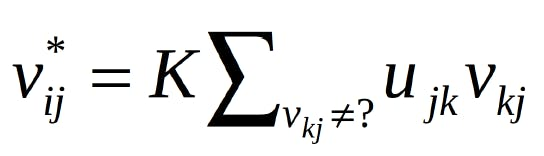





##### Item-based Collaborative Filtering
Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

#### Singular Value Decomposition
One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance. Since we do not know the rating for the unseen items, we will temporarily ignore them. Namely, we are only minimizing RMSE on the known entries in the utility matrix. To achieve minimal RMSE, Singular Value Decomposition (SVD) is adopted as shown in the below formula.
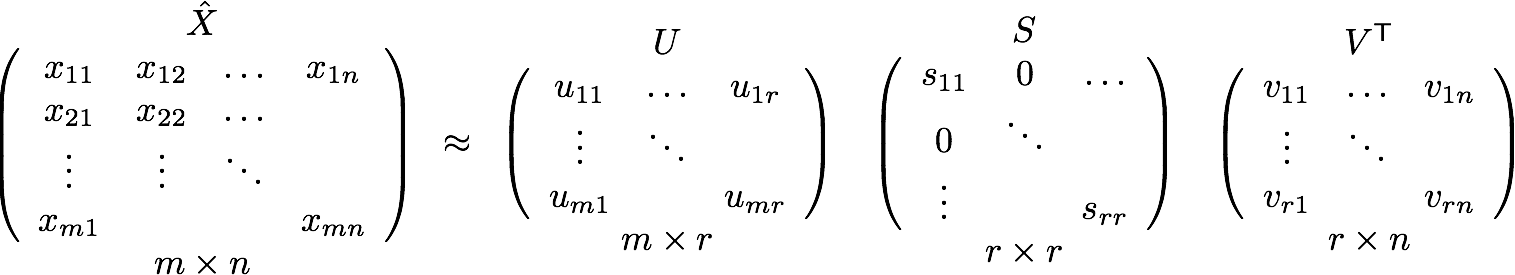
Singular Matrix

X denotes the utility matrix, and U is a left singular matrix, representing the relationship between users and latent factors. S is a diagonal matrix describing the strength of each latent factor, while V transpose is a right singular matrix, indicating the similarity between items and latent factors.

Latent factors describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. 

SVD has a great property that it has the minimal reconstruction Sum of Square Error (SSE); therefore, it is also commonly used in dimensionality reduction. The below formula replace X with A, and S with Σ.
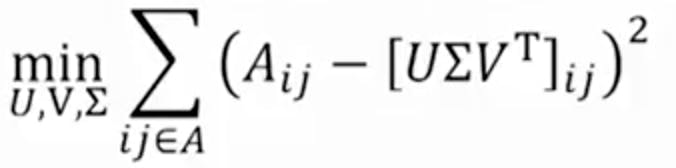
It turns out that RMSE and SSE are monotonically related. This means that the lower the SSE, the lower the RMSE. With the convenient property of SVD that it minimizes SSE, we know that it also minimizes RMSE. Thus, SVD is a great tool for this optimization problem. To predict the unseen item for a user, we simply multiply U, Σ, and T.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Books=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\10.Recommendation System\book.csv',encoding='latin-1')
Books.head()

,Unnamed:0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


###### Data Understanding

In [4]:
Books.shape

(10000, 4)

In [5]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed:0    10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
Books.isnull().sum()

Unnamed:0      0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
Books['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [8]:
Books['Book.Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

###### Data Pre-processing

In [9]:
Book=Books.drop(columns=['Unnamed:0'],axis=1)

In [10]:
Book=Book.rename({'User.ID':'User_ID','Book.Title':'Title','Book.Rating':'Rating'}, axis=1)
Book.head()

,User_ID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [11]:
#finding the book with the highest rating
highest_rated_book=Book[Book['Rating']==Book['Rating'].max()]['Title'].iloc[0]
highest_rating=Book['Rating'].max()
print(f"The book with the highest rating is '{highest_rated_book}' with a rating of {highest_rating}.")

The book with the highest rating is 'What If?: The World's Foremost Military Historians Imagine What Might Have Been' with a rating of 10.


###### Data Visualization

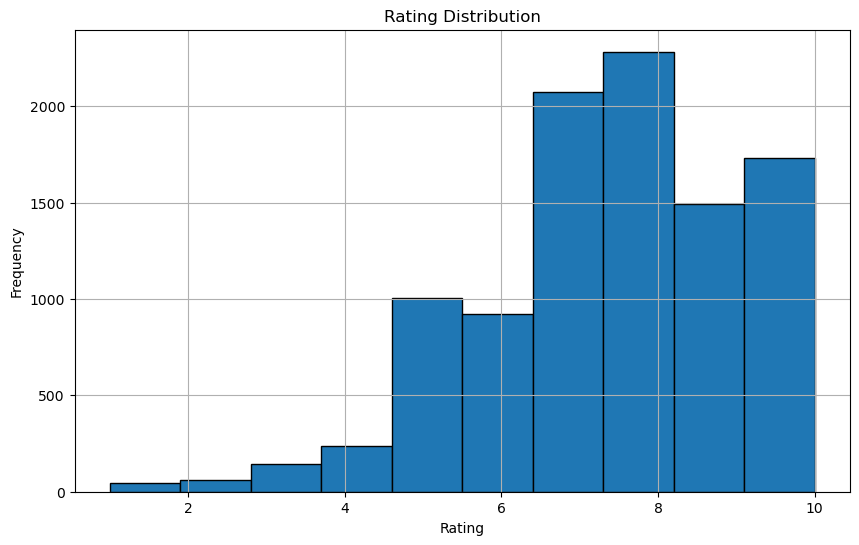

In [12]:
#Visualizing Rating distribution
plt.figure(figsize=(10,6))
Book['Rating'].hist(bins=10,edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

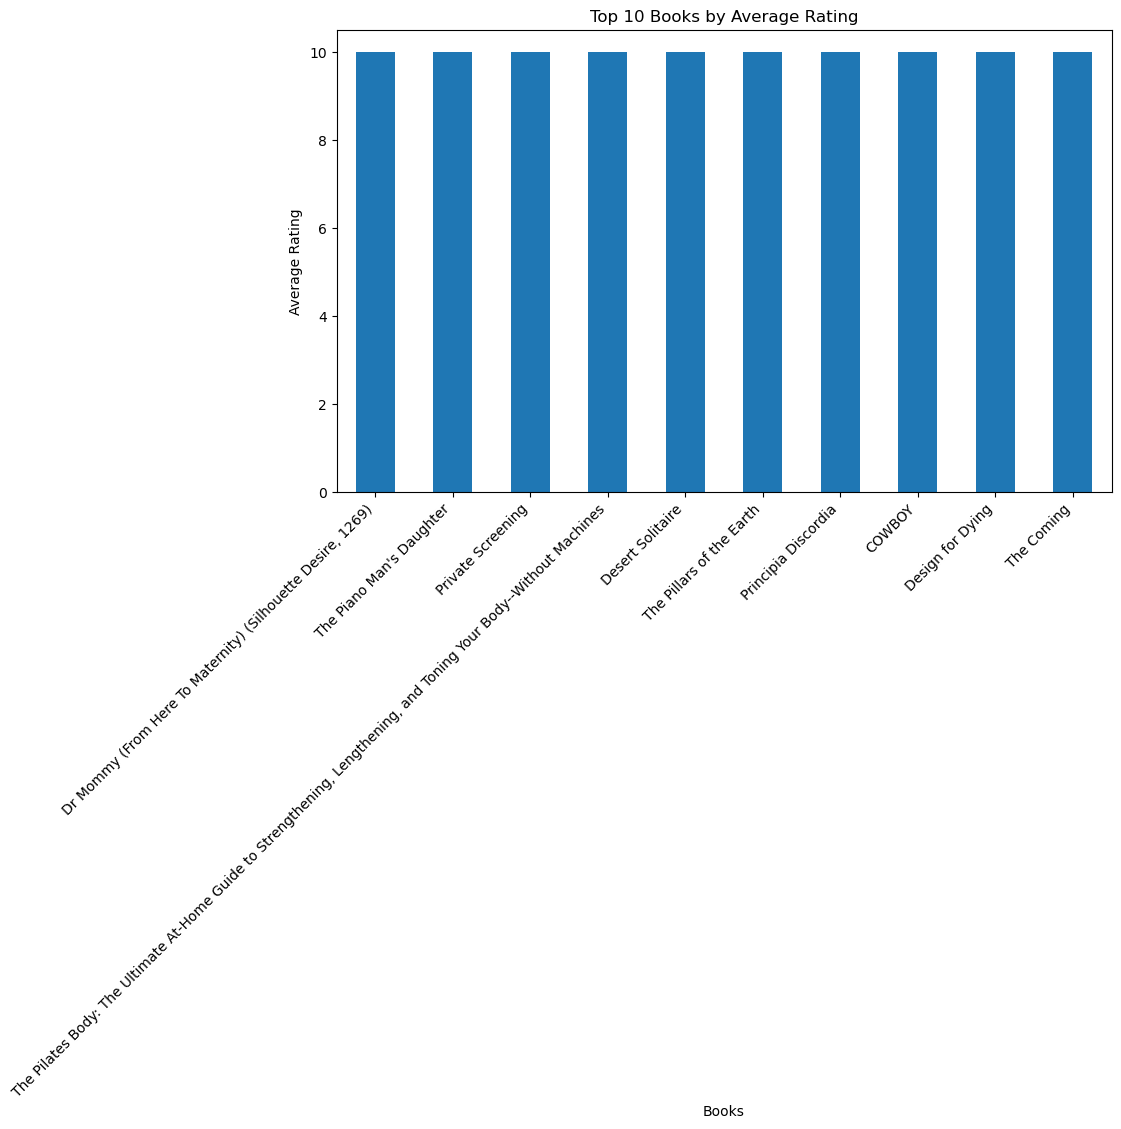

In [13]:
#Top N books based on average rating
N=10
top_books=Book.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(N)
plt.figure(figsize=(10,6))
top_books.plot(kind='bar')
plt.title(f'Top {N} Books by Average Rating')
plt.xlabel('Books')
plt.ylabel('Average Rating')
plt.xticks(rotation=45,ha='right')
plt.show()

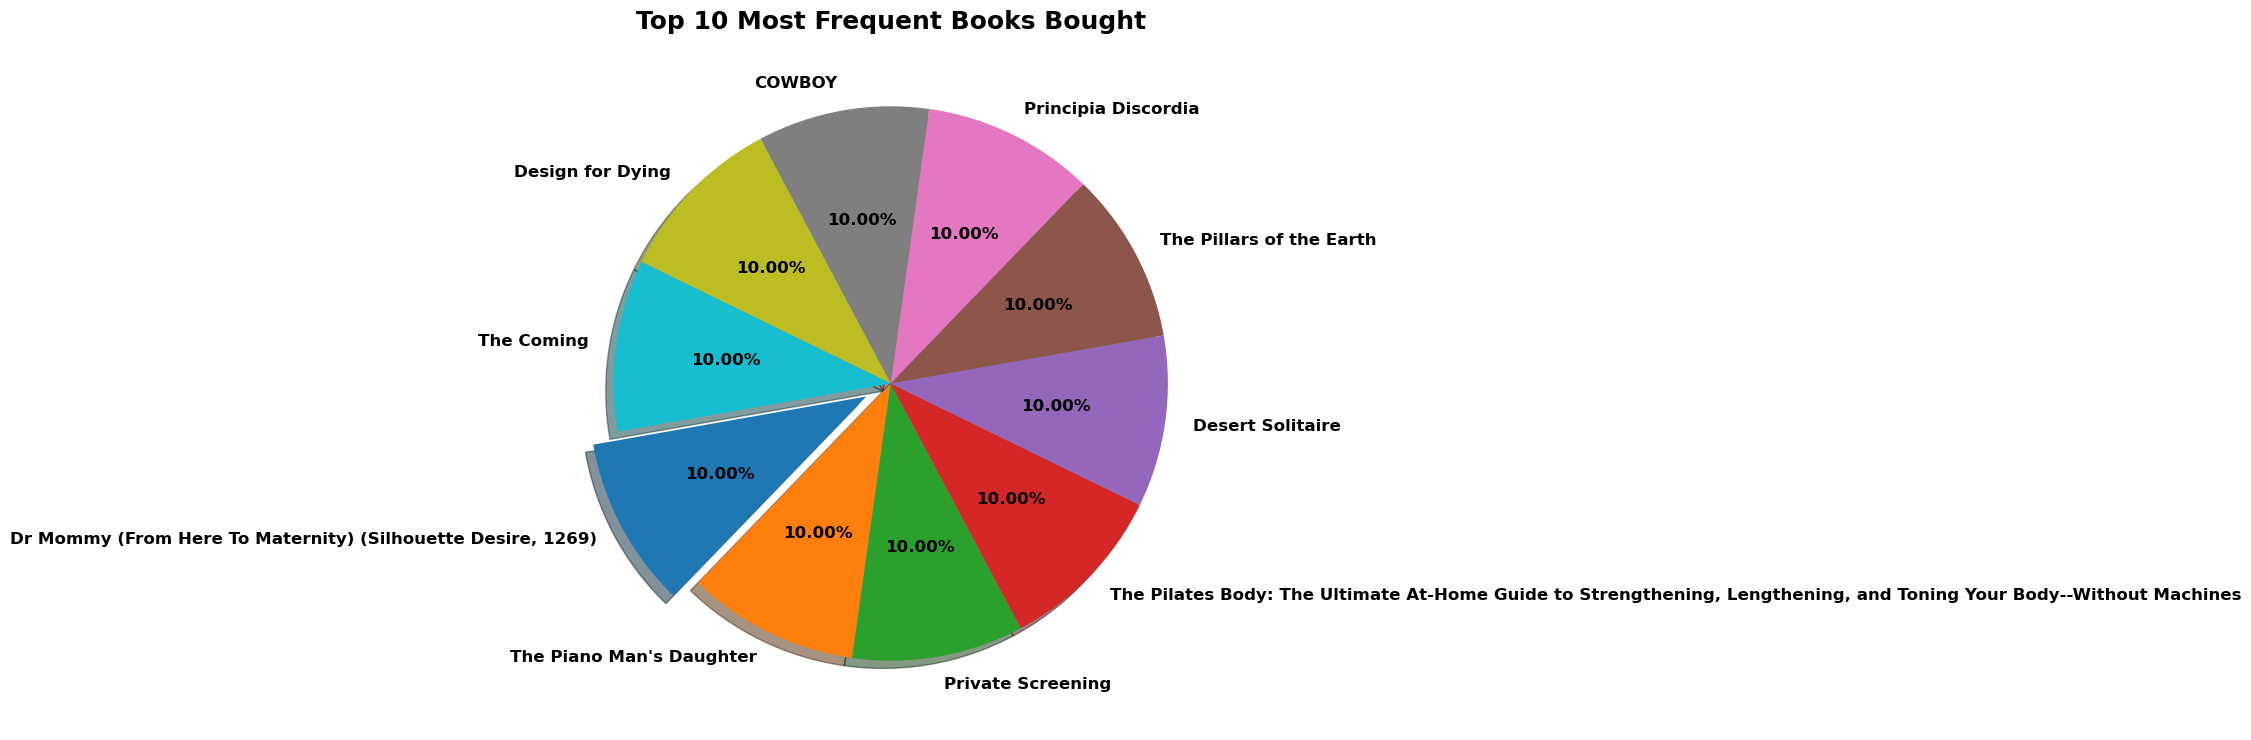

In [14]:
plt.figure(figsize=(16,9))
plt.pie(top_books,
       labels=top_books.index,
       explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops= {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Most Frequent Books Bought",fontsize=18,fontweight='bold')
plt.show()

###### Recommnedation based on Cosine Similarity

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Create a user-book matrix with ratings
user_book_matrix=Book.pivot_table(index='User_ID',columns='Title',values='Rating',fill_value=0)

#Calculate cosine similarity
cosine_sim=cosine_similarity(user_book_matrix)

#Function to get book recommendations based on cosine similarity
def get_recommendations(book_title,cosine_sim_matrix,book_data):
    book_index=book_data[book_data['Title']==book_title].index[0]
    similar_books=list(enumerate(cosine_sim_matrix[book_index]))
    similar_books=sorted(similar_books,key=lambda x: x[1],reverse=True)
    recommended_books=[]
    for i in range(1,len(similar_books)):
        similar_book_index=similar_books[i][0]
        recommended_books.append(book_data['Title'].iloc[similar_book_index])
    return recommended_books

#User input for book title
user_input_book='The Da Vinci Code'

#Get book recommendations
recommendations=get_recommendations(user_input_book,cosine_sim,Book)

print(f"Recommendations for '{user_input_book}':")
for book in recommendations:
    print(book)

Recommendations for 'The Da Vinci Code':
Classical Mythology
Clara Callan
Decision in Normandy
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
The Mummies of Urumchi
The Kitchen God's Wife
What If?: The World's Foremost Military Historians Imagine What Might Have Been
PLEADING GUILTY
Under the Black Flag: The Romance and the Reality of Life Among the Pirates
Where You'll Find Me: And Other Stories
Nights Below Station Street
Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust
The Middle Stories
Jane Doe
A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)
The Witchfinder (Amos Walker Mystery Series)
More Cunning Than Man: A Social History of Rats and Man
Goodbye to the Buttermilk Sky
The Testament
Beloved (Plume Contemporary Fiction)
Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source
New Vegetarian: Bold and Beautiful Recipes for Every Occasion
I

##### Item-Based Collaborative Filterings

In [17]:
pivot_table=Book.pivot_table(index='User_ID',columns='Title',values='Rating').fillna(0)

#calculating item similarity using cosine similarity
item_similarity=cosine_similarity(pivot_table.T)

#create a dataframe for item similarity
item_similarity_df=pd.DataFrame(item_similarity,index=pivot_table.columns,columns=pivot_table.columns)

#function to get book recommendations based on item similarity
def get_book_recommendations(book_title,num_recommendations=5):
    similar_books=item_similarity_df[book_title].sort_values(ascending=False)
    recommended_books=similar_books.drop(book_title).head(num_recommendations)
    return recommended_books.index.tolist()

#get recommendations for a specific book
book_to_recommend='The Da Vinci Code'  
recommendations=get_book_recommendations(book_to_recommend)

print(f"Recommended books for '{book_to_recommend}':")
for i,book in enumerate(recommendations,start=1):
    print(f"{i}.{book}")

Recommended books for 'The Da Vinci Code':
1.Le Diable Au Corps
2.Globalhead
3.The True and Outstanding Adventures of the Hunt Sisters: A Novel
4.Julie and Romeo
5.Final Appeal


In [18]:
#get recommendations for a specific book
book_to_recommend="What If?: The World's Foremost Military Historians Imagine What Might Have Been" 
recommendations=get_book_recommendations(book_to_recommend)

print(f"Recommended books for '{book_to_recommend}':")
for i,book in enumerate(recommendations,start=1):
    print(f"{i}.{book}")

Recommended books for 'What If?: The World's Foremost Military Historians Imagine What Might Have Been':
1.Sprinter (Hunter's Western Series)
2.Spot Visits His Grandparents (Picture Puffins)
3.Spring Break
4.Spring Break (Sweet Valley High Super Edition, No 3)
5.Spring Collection


In [19]:
#evaluating collaborative filtering recommendations (proxy for user engagement)
total_users=pivot_table.shape[0]
total_recommendations=0
for user_id in pivot_table.index:
    user_books=pivot_table.loc[user_id]
    for book_title,rating in user_books.iteritems():
        if rating>0:
            similar_books=list(pivot_table.columns[item_similarity[pivot_table.columns.get_loc(book_title)].argsort()[::-1][1:6]])
            total_recommendations += len(similar_books)

average_recommendations_per_user=total_recommendations/total_users
print(f"Average recommendations per user: {average_recommendations_per_user:.2f}")

Average recommendations per user: 22.90


###### Content-based recommendation

We're using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique to represent the book titles as numerical vectors. Then, we calculate the cosine similarity between these vectors to measure the similarity between books. The get_book_recommendations function takes a book title, finds its index in the dataset, calculates the similarity scores between the book and all other books, sorts them, and returns a list of recommended book titles.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#calculate TF-IDF vectors for book titles
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf_vectorizer.fit_transform(Book['Title'])

#calculate cosine similarity between books
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

#function to get book recommendations based on content similarity
def get_book_recommendations(book_title,num_recommendations=5):
    book_index=Book[Book['Title']==book_title].index[0]
    similar_books=list(enumerate(cosine_sim[book_index]))
    similar_books=sorted(similar_books,key=lambda x: x[1],reverse=True)
    recommended_books= [Book['Title'][i[0]] for i in similar_books[1:num_recommendations+1]]
    return recommended_books

#get recommendations for a specific book
book_to_recommend='The Da Vinci Code' 
recommendations=get_book_recommendations(book_to_recommend)

print(f"Recommended books for '{book_to_recommend}':")
for i,book in enumerate(recommendations,start=1):
    print(f"{i}. {book}")

Recommended books for 'The Da Vinci Code':
1. The Da Vinci Code
2. El Codigo Da Vinci / The Da Vinci Code
3. El desarrollo de Leonardo da Vinci (BiografÃ­as y memorias)
4. The BIBLE CODE
5. Fortune Is a River : Leonardo Da Vinci and Niccolo Machiavelli's Magnificent Dream to Change the Course of Florentine History


In [21]:
#get recommendations for a specific book
book_to_recommend='A Painted House' 
recommendations=get_book_recommendations(book_to_recommend)

print(f"Recommended books for '{book_to_recommend}':")
for i,book in enumerate(recommendations,start=1):
    print(f"{i}. {book}")

Recommended books for 'A Painted House':
1. Black As He's Painted
2. Someone in the House
3. Full House
4. From Our House
5. The Painted Veil (Penguin Twentieth Century Classics)


In [22]:
#evaluating content-based recommendations (proxy for user engagement)
total_users=Book['User_ID'].nunique()
total_recommendations=0
for user_id in Book['User_ID'].unique():
    user_books=Book[Book['User_ID']==user_id]['Title'].tolist()
    for book in user_books:
        recommendations=get_book_recommendations(book)
        total_recommendations+=len(recommendations)

average_recommendations_per_user= total_recommendations/total_users
print(f"Average recommendations per user: {average_recommendations_per_user:.2f}")

Average recommendations per user: 22.91
